<a href="https://colab.research.google.com/github/pranit06/Deep_Learning/blob/main/Lecture_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LECTURE ASSIGNMENT 2: STOCK MARKET PREDICTION**

In [1]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = web.DataReader('BRITANNIA.NS', data_source='yahoo', start='2016-01-01', end='2021-2-25')

In [3]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,1501.675049,1481.199951,1481.199951,1493.199951,129486.0,1402.360718
2016-01-04,1502.224976,1476.000000,1490.000000,1486.300049,253614.0,1395.880615
2016-01-05,1496.275024,1475.150024,1488.550049,1483.349976,228500.0,1393.110107
2016-01-06,1503.000000,1476.500000,1476.500000,1500.849976,267276.0,1409.545410
2016-01-07,1497.425049,1455.525024,1495.000000,1473.275024,298800.0,1383.647949
...,...,...,...,...,...,...
2021-02-22,3373.750000,3317.300049,3350.000000,3341.199951,666371.0,3341.199951
2021-02-23,3368.000000,3325.300049,3349.800049,3335.949951,484686.0,3335.949951
2021-02-24,3415.000000,3341.000000,3360.000000,3405.550049,512568.0,3405.550049


In [4]:
data.iloc[data.shape[0]-39:,3]

Date
2021-01-04    3552.899902
2021-01-05    3551.100098
2021-01-06    3539.699951
2021-01-07    3552.800049
2021-01-08    3575.250000
2021-01-11    3612.850098
2021-01-12    3631.649902
2021-01-13    3621.149902
2021-01-14    3665.449951
2021-01-15    3609.050049
2021-01-18    3607.850098
2021-01-19    3601.250000
2021-01-20    3592.300049
2021-01-21    3630.800049
2021-01-22    3608.000000
2021-01-25    3613.550049
2021-01-27    3610.750000
2021-01-28    3603.750000
2021-01-29    3501.100098
2021-02-01    3520.750000
2021-02-02    3501.250000
2021-02-03    3516.500000
2021-02-04    3580.000000
2021-02-05    3541.649902
2021-02-08    3473.699951
2021-02-09    3462.399902
2021-02-10    3424.850098
2021-02-11    3462.750000
2021-02-12    3421.250000
2021-02-15    3417.000000
2021-02-16    3389.449951
2021-02-17    3364.000000
2021-02-18    3359.449951
2021-02-19    3331.199951
2021-02-22    3341.199951
2021-02-23    3335.949951
2021-02-24    3405.550049
2021-02-25    3405.000000
2021-02

In [5]:
data.shape

(1272, 6)

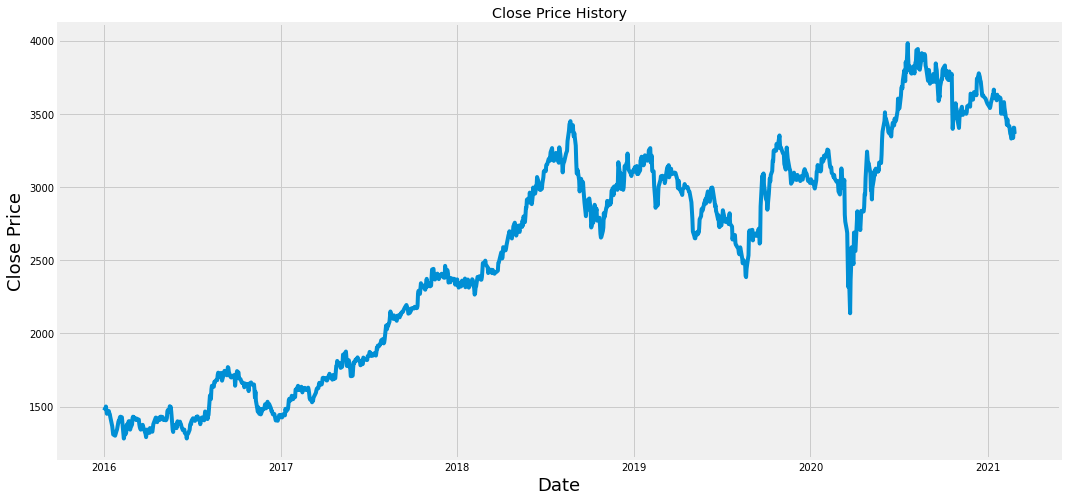

In [6]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [7]:
data = data.filter(['Close'])
dataset = data.values
training_data_len = data.shape[0]-39

training_data_len

1233

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [9]:
scaled_data

array([[0.07816925],
       [0.07561426],
       [0.07452186],
       ...,
       [0.78630284],
       [0.78609916],
       [0.77082449]])

In [10]:
train_data = scaled_data[0:training_data_len, :]
x_train, y_train = [], []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.07816925, 0.07561426, 0.07452186, 0.08100202, 0.07079116,
       0.06259838, 0.06574589, 0.06961545, 0.06313529, 0.0617282 ,
       0.05460924, 0.03723318, 0.0312529 , 0.02138453, 0.01027568,
       0.00957212, 0.00710969, 0.01582084, 0.0196349 , 0.02318972,
       0.04375036, 0.042334  , 0.04885118, 0.0540816 , 0.0552295 ,
       0.05379461, 0.04052881, 0.02921628, 0.0129233 , 0.        ,
       0.01882949, 0.01142359, 0.01629298, 0.03504843, 0.02967915,
       0.04353746, 0.04407437, 0.03502989, 0.02254171, 0.02744811,
       0.03555758, 0.05137842, 0.05529432, 0.05140622, 0.05387792,
       0.04718485, 0.05065637, 0.05007313, 0.04663868, 0.04792544,
       0.03602045, 0.02890154, 0.0246987 , 0.02251395, 0.03161393,
       0.03467813, 0.02982728, 0.01136808, 0.00350854, 0.01375647])]
[0.022643545230610518]

[array([0.07816925, 0.07561426, 0.07452186, 0.08100202, 0.07079116,
       0.06259838, 0.06574589, 0.06961545, 0.06313529, 0.0617282 ,
       0.05460924, 0.03723318, 0.0

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1173, 60, 1)

In [13]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1173/1173 [==============================] - 34s 26ms/step - loss: 0.0035


In [17]:
test_data = scaled_data[training_data_len-60:,:]

x_test, y_test = [], dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
x_test = np.array(x_test)

In [19]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [21]:
rmse = np.sqrt(np.mean(prediction- y_test)**2)

In [22]:
rmse

35.270802033253204

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction 
valid['Error Precentage'] = ((valid['Close'] - valid['Prediction'])/valid['Close'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


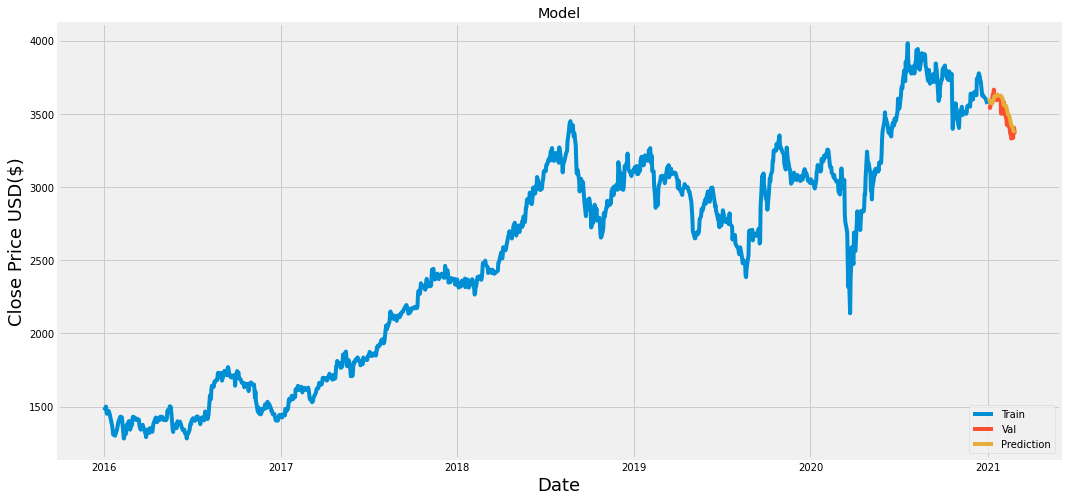

In [24]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'], loc='lower right')
plt.show()

In [25]:
valid

,Close,Prediction,Error Precentage
Date,,,
2021-01-04,3552.899902,3605.659180,-1.484964
2021-01-05,3551.100098,3595.386719,-1.247124
2021-01-06,3539.699951,3586.510742,-1.322451
2021-01-07,3552.800049,3577.867920,-0.705581
2021-01-08,3575.250000,3572.621094,0.073531
2021-01-11,3612.850098,3572.703857,1.111207
2021-01-12,3631.649902,3580.371826,1.411977
2021-01-13,3621.149902,3592.670898,0.786463
2021-01-14,3665.449951,3603.665771,1.685582
